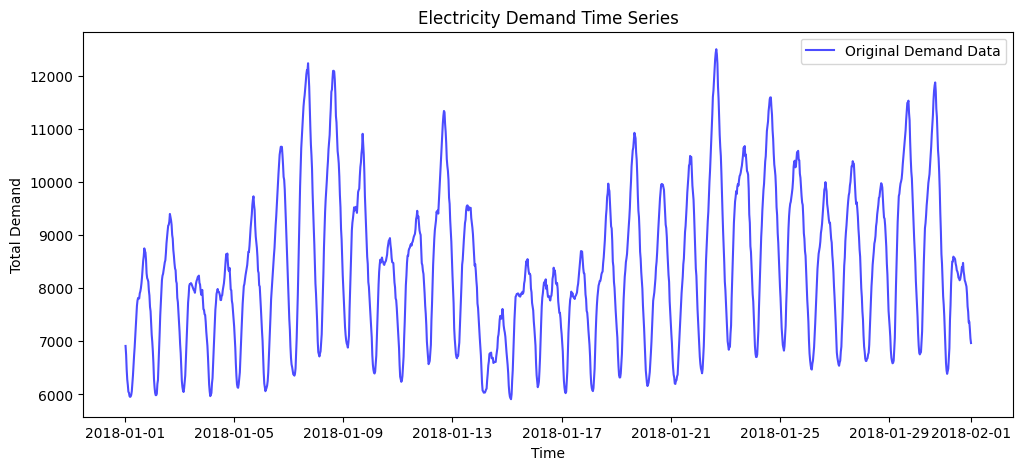

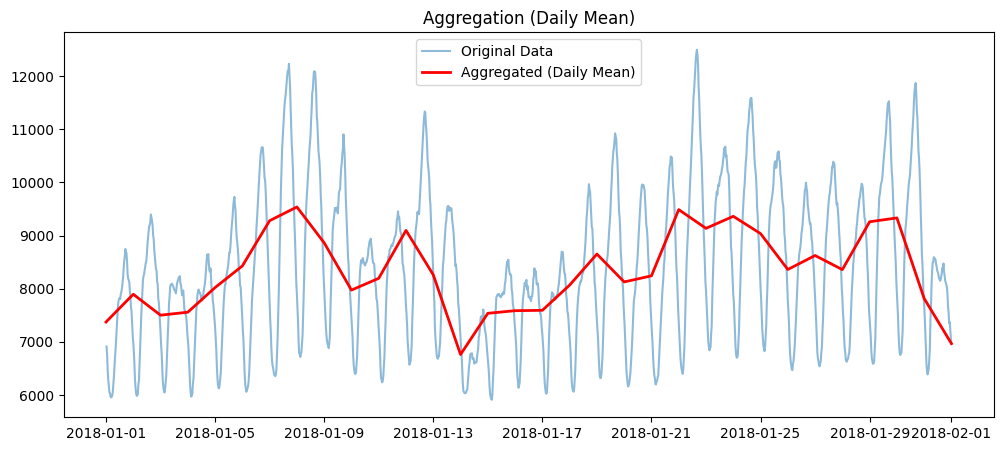

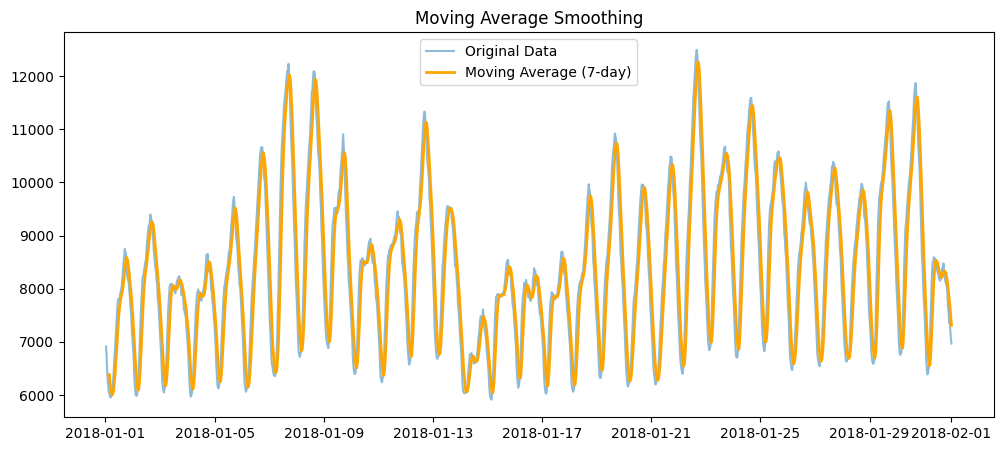

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)


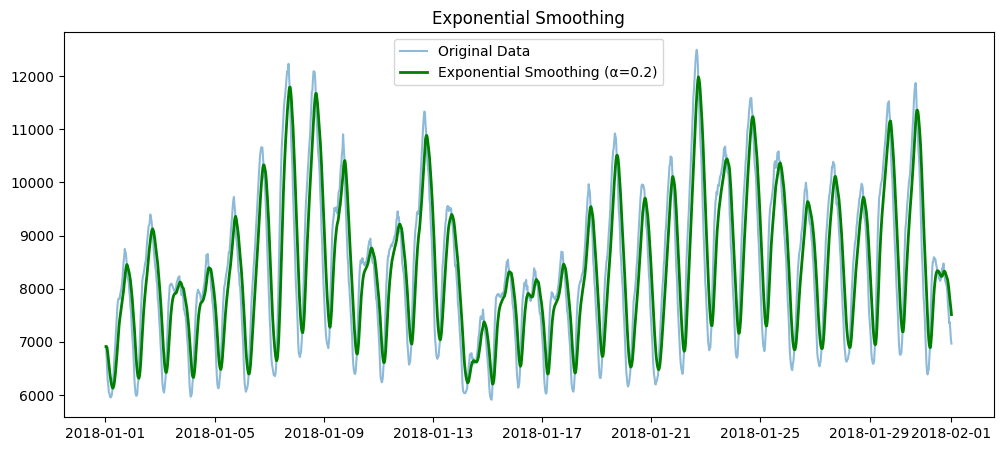

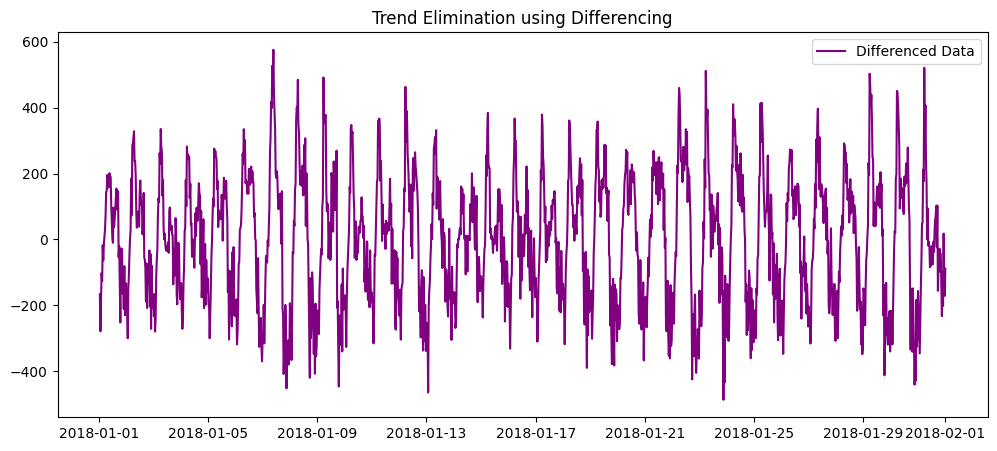

,TOTALDEMAND,MA_rolling,Exp_Smoothing,Differenced
SETTLEMENTDATE,,,,
2018-01-01 00:30:00,6912.25,NaN,6912.25000,NaN
2018-01-01 01:00:00,6745.63,NaN,6912.25000,-166.62
2018-01-01 01:30:00,6466.06,NaN,6878.92600,-279.57
2018-01-01 02:00:00,6279.80,NaN,6796.35280,-186.26
2018-01-01 02:30:00,6177.31,NaN,6693.04224,-102.49


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
# Convert SETTLEMENTDATE to datetime and set as index
df = pd.read_csv("/content/PRICE_AND_DEMAND_201801_NSW1.csv")
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])
df.set_index('SETTLEMENTDATE', inplace=True)

# Select only TOTALDEMAND column
df = df[['TOTALDEMAND']]

# Plot Original Time Series Data
plt.figure(figsize=(12, 5))
plt.plot(df, label='Original Demand Data', color='blue', alpha=0.7)
plt.title('Electricity Demand Time Series')
plt.xlabel('Time')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

# 1. Aggregation (Resampling to Daily Mean)
df_daily = df.resample('D').mean()

plt.figure(figsize=(12, 5))
plt.plot(df, label='Original Data', alpha=0.5)
plt.plot(df_daily, label='Aggregated (Daily Mean)', linewidth=2, color='red')
plt.title('Aggregation (Daily Mean)')
plt.legend()
plt.show()

# 2. Moving Average Smoothing (7-day window)
df['MA_rolling'] = df['TOTALDEMAND'].rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['TOTALDEMAND'], label='Original Data', alpha=0.5)
plt.plot(df['MA_rolling'], label='Moving Average (7-day)', linewidth=2, color='orange')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

# 3. Exponential Smoothing (alpha=0.2)
model = SimpleExpSmoothing(df['TOTALDEMAND'].dropna()).fit(smoothing_level=0.2, optimized=False)
df['Exp_Smoothing'] = model.fittedvalues

plt.figure(figsize=(12, 5))
plt.plot(df['TOTALDEMAND'], label='Original Data', alpha=0.5)
plt.plot(df['Exp_Smoothing'], label='Exponential Smoothing (α=0.2)', linewidth=2, color='green')
plt.title('Exponential Smoothing')
plt.legend()
plt.show()

# 4. Differencing to Remove Trend
df['Differenced'] = df['TOTALDEMAND'].diff()

plt.figure(figsize=(12, 5))
plt.plot(df['Differenced'], label='Differenced Data', color='purple')
plt.title('Trend Elimination using Differencing')
plt.legend()
plt.show()

# Display processed data head
df.head()
